In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

sys.path.append("../code/")
from utils import *

In [2]:
parcellations_df = get_atlas_mapping()
parcellations_df

index  ROI Label                        ROI Name   R   A   S Hemisphere  \
0        0          1              7Networks_LH_Vis_1 -32 -42 -20         LH   
1        1          2              7Networks_LH_Vis_2 -30 -32 -18         LH   
2        2          3              7Networks_LH_Vis_3 -36 -62 -16         LH   
3        3          4              7Networks_LH_Vis_4 -24 -54  -8         LH   
4        4          5              7Networks_LH_Vis_5 -24 -72 -10         LH   
..     ...        ...                             ...  ..  ..  ..        ...   
395    395        396  7Networks_RH_Default_pCunPCC_5   4 -64  32         RH   
396    396        397  7Networks_RH_Default_pCunPCC_6   6 -38  34         RH   
397    397        398  7Networks_RH_Default_pCunPCC_7   4 -20  36         RH   
398    398        399  7Networks_RH_Default_pCunPCC_8  10 -52  36         RH   
399    399        400  7Networks_RH_Default_pCunPCC_9   8 -50  44         RH   

    Network  
0        VN  
1        VN  
2        VN  
3        VN  
4        VN  
..      ...  
395     DMN  
396     DMN  
397     DMN  
398     DMN  
399     DMN  

[400 rows x 8 columns]

In [3]:
get_network_ids_for_plots()

{'VN_LH': array([ 0, 30], dtype=int64),
 'SMN_LH': array([30, 67], dtype=int64),
 'DAN_LH': array([67, 90], dtype=int64),
 'VAN_LH': array([ 90, 112], dtype=int64),
 'LN_LH': array([112, 125], dtype=int64),
 'FPN_LH': array([125, 147], dtype=int64),
 'DMN_LH': array([147, 199], dtype=int64),
 'VN_RH': array([200, 229], dtype=int64),
 'SMN_RH': array([229, 269], dtype=int64),
 'DAN_RH': array([269, 292], dtype=int64),
 'VAN_RH': array([292, 317], dtype=int64),
 'LN_RH': array([317, 330], dtype=int64),
 'FPN_RH': array([330, 360], dtype=int64),
 'DMN_RH': array([360, 399], dtype=int64)}

In [4]:
networks_ids_for_plot = reorder_network_ids_for_plots(
    get_network_ids_for_plots()
)
networks_ids_for_plot

{'VN_LH': array([ 0, 30], dtype=int64),
 'VN_RH': array([200, 229], dtype=int64),
 'SMN_LH': array([30, 67], dtype=int64),
 'SMN_RH': array([229, 269], dtype=int64),
 'DAN_LH': array([67, 90], dtype=int64),
 'DAN_RH': array([269, 292], dtype=int64),
 'VAN_LH': array([ 90, 112], dtype=int64),
 'VAN_RH': array([292, 317], dtype=int64),
 'LN_LH': array([112, 125], dtype=int64),
 'LN_RH': array([317, 330], dtype=int64),
 'FPN_LH': array([125, 147], dtype=int64),
 'FPN_RH': array([330, 360], dtype=int64),
 'DMN_LH': array([147, 199], dtype=int64),
 'DMN_RH': array([360, 399], dtype=int64)}

In [5]:
networks_ids_for_plot_remapped = make_networks_ids_contiguous(
    networks_ids_for_plot
)
networks_ids_for_plot_remapped

{'VN_LH': array([ 0, 30], dtype=int64),
 'VN_RH': [30, 59],
 'SMN_LH': [59, 96],
 'SMN_RH': [96, 136],
 'DAN_LH': [136, 159],
 'DAN_RH': [159, 182],
 'VAN_LH': [182, 204],
 'VAN_RH': [204, 229],
 'LN_LH': [229, 242],
 'LN_RH': [242, 255],
 'FPN_LH': [255, 277],
 'FPN_RH': [277, 307],
 'DMN_LH': [307, 359],
 'DMN_RH': [359, 398]}

In [6]:
# make a dict that contains only the network without hemispheres
networks_ids_for_plot_remapped_no_hemis = {}
network_names = [name.split("_")[0] for name in networks_ids_for_plot.keys()]
network_names = network_names[::2]
for i, indices in enumerate(networks_ids_for_plot_remapped.values()):
    if i % 2 == 0:
        networks_ids_for_plot_remapped_no_hemis[network_names[i // 2]] = [
            indices[0],
            0,
        ]
    else:
        networks_ids_for_plot_remapped_no_hemis[network_names[i // 2]][
            1
        ] = indices[1]

In [7]:
networks_ids_for_plot_remapped_no_hemis

{'VN': [0, 59],
 'SMN': [59, 136],
 'DAN': [136, 182],
 'VAN': [182, 229],
 'LN': [229, 255],
 'FPN': [255, 307],
 'DMN': [307, 398]}

In [8]:
attributions = np.load(
    "results/LinearShared_best_repro_FINAL_attributions.npy"
)

attributions_cmap = "icefire"
# attributions_cmap = "vlag"

In [9]:
attributions.shape

(9, 24, 400, 400)

In [10]:
xticks = []
for k, v in networks_ids_for_plot_remapped.items():
    xticks.append(np.mean(v))
yticks = xticks
# add network name on the xticks
xticklabels = list(networks_ids_for_plot_remapped.keys())
yticklabels = xticklabels
# add vlines to separate networks

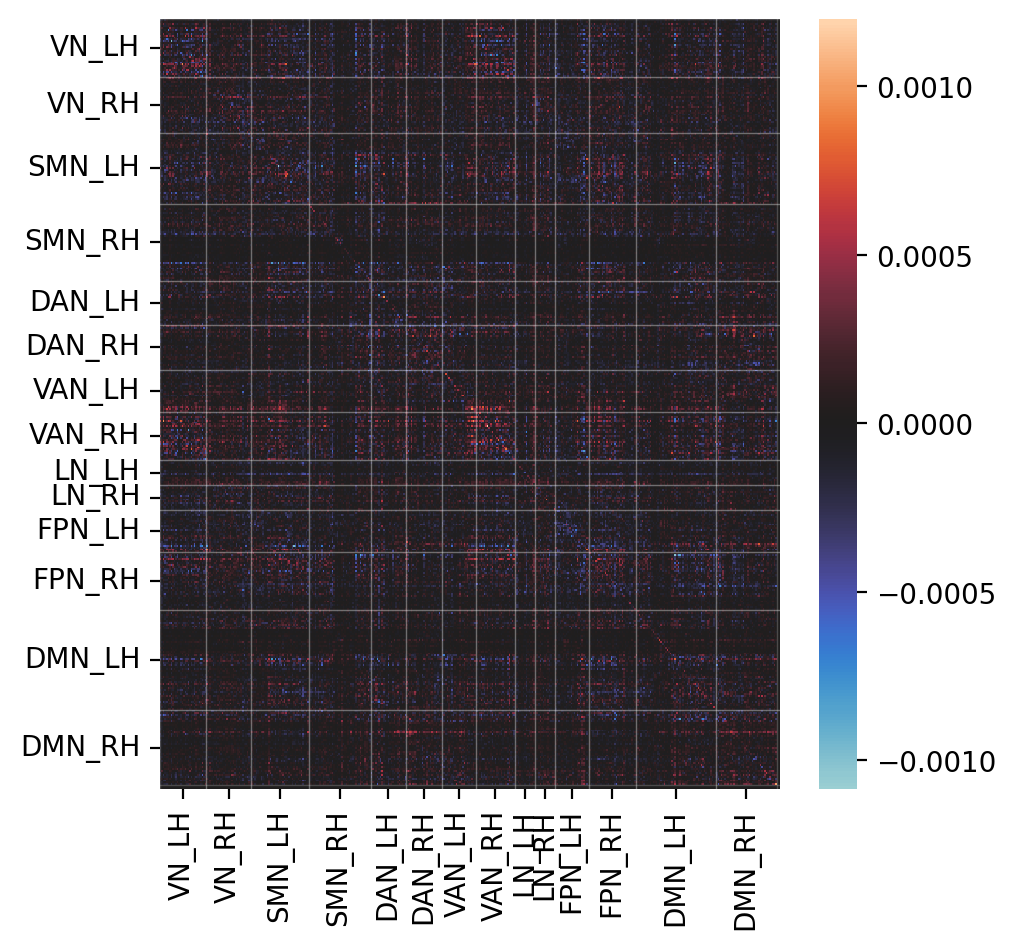

In [11]:
lw = 0.5
alpha = 0.2
plot = attributions[0]
plt.figure(figsize=(5, 5), dpi=200)
sns.heatmap(
    move_networks_to_adjacent(plot.mean(axis=0)),
    cmap=attributions_cmap,
    center=0,
)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot_remapped.values():
    plt.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="white", linewidth=lw, alpha=alpha)

In [12]:
def network_mean(matrix, network_ids=networks_ids_for_plot_remapped):
    mean_matrix = np.zeros_like(matrix)
    for k1, v1 in network_ids.items():
        for k2, v2 in network_ids.items():
            mean_matrix[v1[0] : v1[1] + 1, v2[0] : v2[1] + 1] = (
                matrix[v1[0] : v1[1] + 1, v2[0] : v2[1] + 1].flatten().mean()
            )
    return mean_matrix

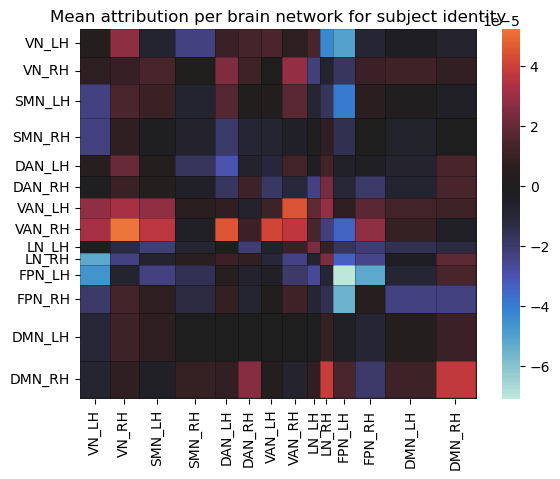

In [13]:
plot = move_networks_to_adjacent(attributions[0].mean(axis=0))
plot = network_mean(plot)

sns.heatmap(plot, cmap=attributions_cmap, center=0)
plt.xticks(ticks=xticks, labels=xticklabels, rotation=90)
plt.yticks(ticks=yticks, labels=yticklabels, rotation=0)
for v in networks_ids_for_plot_remapped.values():
    plt.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
    plt.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
    plt.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
plt.title("Mean attribution per brain network for subject identity")
plt.show()

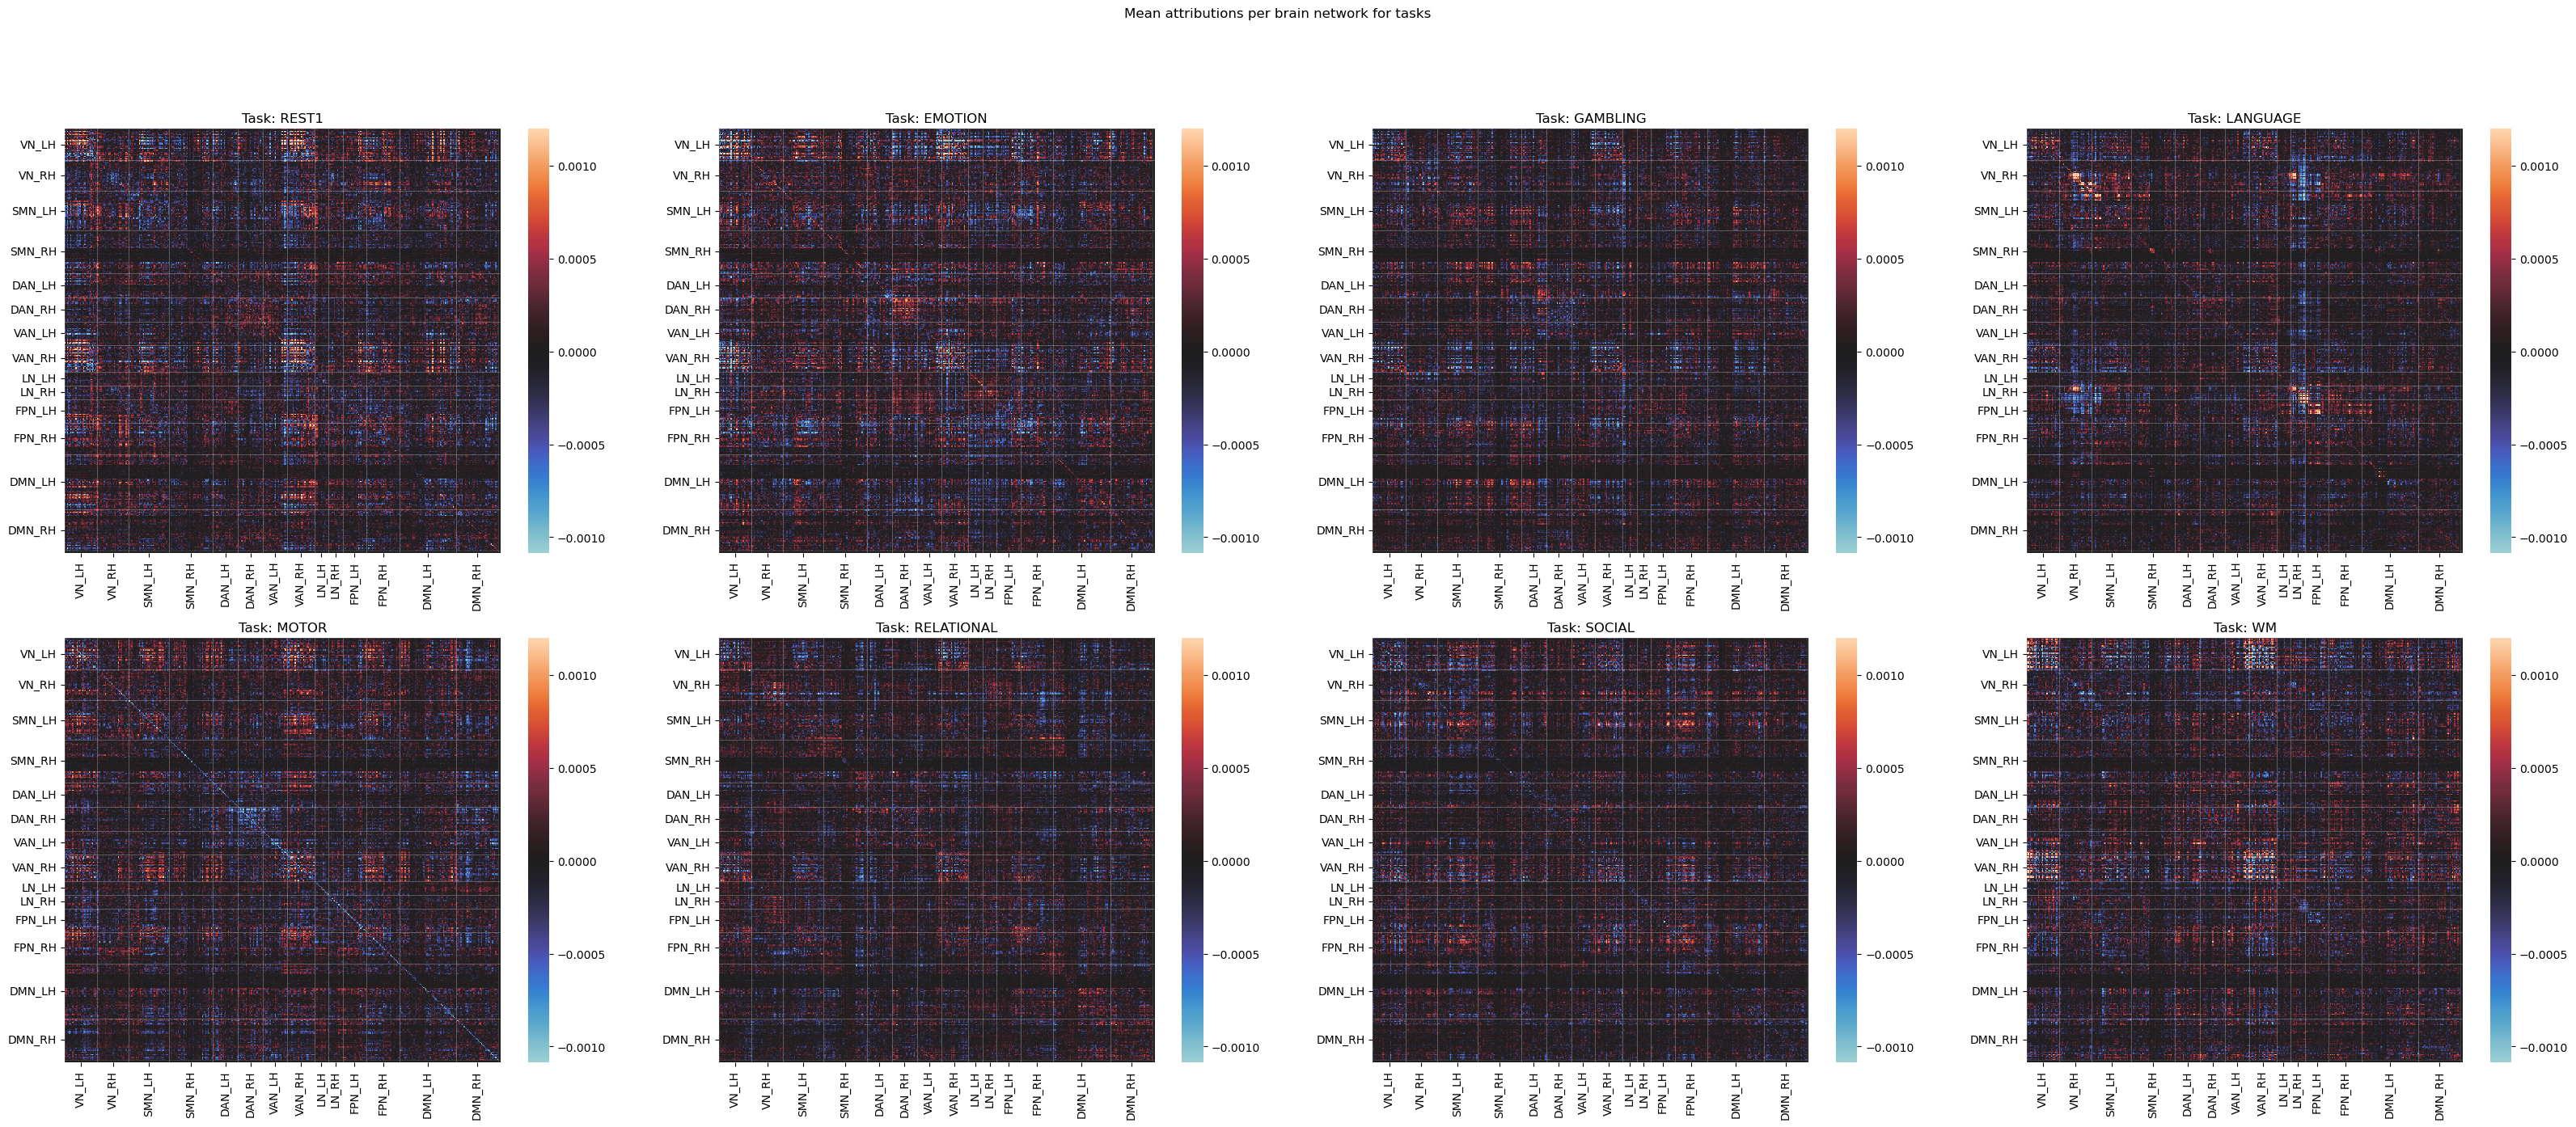

In [14]:
task_labels = [
    "REST1",
    "EMOTION",
    "GAMBLING",
    "LANGUAGE",
    "MOTOR",
    "RELATIONAL",
    "SOCIAL",
    "WM",
]
vmin = attributions[:1].mean(axis=1).min()
vmax = attributions[:1].mean(axis=1).max()
fig, axs = plt.subplots(2, 4, figsize=(40, 15), dpi=100)
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(
        move_networks_to_adjacent(attributions[i + 1].mean(axis=0)),
        cmap=attributions_cmap,
        center=0,
        ax=ax,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot_remapped.values():
        ax.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="white", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
plt.suptitle(f"Mean attributions per brain network for tasks")
plt.show()

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
import matplotlib.ticker as tkr

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
attributions_cmap = "icefire"
task_labels = [
    "REST1",
    "EMOTION",
    "GAMBLING",
    "LANGUAGE",
    "MOTOR",
    "RELATIONAL",
    "SOCIAL",
    "WM",
]

# use xticks and xlabels without hemispheres
xticks = [
    int(np.mean(v)) for v in networks_ids_for_plot_remapped_no_hemis.values()
]
xticklabels = list(networks_ids_for_plot_remapped_no_hemis.keys())
yticks = xticks
yticklabels = xticklabels

window_mean = np.array(
    [network_mean(move_networks_to_adjacent(att.mean(axis=0)), networks_ids_for_plot_remapped) for att in attributions[1:]]
)
# set font size
prev_font_size = plt.rcParams["font.size"]
plt.rcParams.update({"font.size": 40})
# ensure there is no overlap between subplots
vmin = window_mean.min()
vmax = window_mean.max()
fig, axs = plt.subplots(
    4, 2, figsize=(30, 60), dpi=200, sharex=True, sharey=True
)
cbar_ax = fig.add_axes([0.93, 0.3, 0.01, 0.4])
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    sns.heatmap(
        network_mean(move_networks_to_adjacent(attributions[i + 1].mean(0)), networks_ids_for_plot_remapped),
        cmap=attributions_cmap,
        center=0,
        ax=ax,
        vmin=vmin,
        vmax=vmax,
        cbar_kws={
            "label": "Attribution",
            "shrink": 0.5,
            "format": formatter,
        },
        cbar=i == 0,
        cbar_ax=None if i else cbar_ax,
    )
    ax.set_xticks(ticks=xticks)
    ax.set_yticks(ticks=yticks)
    major_font_size = 60
    ax.set_xticklabels(xticklabels, rotation=90, fontsize=major_font_size)
    ax.set_yticklabels(yticklabels, rotation=0, fontsize=major_font_size)
    # set offset for major labels so they don't overlap with minor labels
    if i % 2 == 0:
        ax.tick_params(axis="y", which="major", length=50)
    if i == len(task_labels) - 1 or i == len(task_labels) - 2:
        ax.tick_params(axis="x", which="major", length=50)
    # minor ticks
    ax.set_xticks(
        ticks=[
            (v[0] + v[1]) / 2 for v in networks_ids_for_plot_remapped.values()
        ],
        minor=True,
    )
    ax.set_yticks(
        ticks=[
            (v[0] + v[1]) / 2 for v in networks_ids_for_plot_remapped.values()
        ],
        minor=True,
    )
    # set labels with L or R
    hemisphere_labels = ["L", "R"] * 7
    ax.set_xticklabels(
        [f"{hem}" for hem in hemisphere_labels], minor=True, fontsize=30
    )
    ax.set_yticklabels(
        [f"{hem}" for hem in hemisphere_labels], minor=True, fontsize=30
    )
    for v in networks_ids_for_plot_remapped.values():
        ax.axvline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="white", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="white", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="white", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")
# set tight layout with a rect that tkaes into account the colorbar
plt.tight_layout(rect=[0, 0, 0.92, 1])
# plt.suptitle(f"Mean attributions per brain network for tasks, averaged per network", fontsize=50)
plt.show()

# set back font size
plt.rcParams.update({"font.size": prev_font_size})

C:\Users\Cyril\AppData\Local\Temp\ipykernel_8584\2578679464.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
attributions.shape

(9, 24, 400, 400)

In [37]:
import networkx as nx
from utils import network_mean_values

adjacency = []
for i in range(window_mean.shape[0]):
    adjacency.append(
        network_mean_values(
            window_mean[i],
            networks_ids_for_plot_remapped,
        )
    )
adjacency = np.abs(np.array(adjacency)) 
# adjacency += np.abs(adjacency.min())
fig, axs = plt.subplots(
    4, 2, figsize=(20, 40), dpi=200, sharex=True, sharey=True
)
# make figure background dark grey
fig.patch.set_facecolor("#333333")
axs_plot = axs.flatten()
cbar_ax = fig.add_axes([0.93, 0.3, 0.2, 0.2])
i = 0

for test in adjacency:
    test = (test-adjacency.min())/(adjacency.max()-adjacency.min())
    # print(test.min())
    with plt.style.context("seaborn-white"):
        # make subplot background dark grey
        axs_plot[i].set_facecolor("#333333")
        G = nx.from_numpy_array(np.matrix(test), create_using=nx.DiGraph)
        # add edge weights from the adjacency matrix
        edge_weights = {}
        for u, v in G.edges():
            # print(test[u, v])
            edge_weights[(u, v)] = test[u, v]
        nx.set_edge_attributes(G, edge_weights, "weight")
        # add the name of brain regions as labels
        labels = []
        for j, region in enumerate(
            networks_ids_for_plot_remapped.keys()
        ):
            labels.append(f"{region[:-1]}")
        labels = {j: v for j, v in enumerate(labels)}
        nx.set_node_attributes(G, labels, "name")
        node_labels = nx.get_node_attributes(G, "name")
        # pos = nx.spring_layout(G, k=0.01, iterations=500)
        # pos = nx.kamada_kawai_layout(G)
        pos = nx.circular_layout(G)
        cmap = sns.color_palette("icefire", as_cmap=True)
        edge_color = []
        for edge in G.edges():
            edge_color.append(
                cmap(
                    edge_weights[edge])
                )
        
        node_plot = nx.draw_networkx_nodes(
            G,
            pos,
            node_size=1000,
            # node_color=node_color, cmap=cmap
            node_color="white",
            ax=axs_plot[i],
        )
        labels_plot = nx.draw_networkx_labels(
            G, pos, labels=node_labels, font_size=10, font_color="black",ax=axs_plot[i]
        )
        edge_plot = nx.draw_networkx_edges(
            G,
            pos,
            edge_color=edge_color,
            width=2,
            #    width=np.array(list(edge_weights.values()))*1e5+1,
            #    alpha=[edge_weights[edge]- min(edge_weights.values()) / (max(edge_weights.values()) - min(edge_weights.values())) for edge in G.edges()]
            alpha=0.9,
            ax=axs_plot[i],
            connectionstyle="arc3,rad=0.1",
        )
        axs_plot[i].set_title(f"Task: {task_labels[i]}", color="white", fontsize=50)
        axs_plot[i].set_axis_off()
        i += 1
        
import matplotlib.collections as mcoll
pc = mcoll.PatchCollection(edge_plot, cmap=cmap)
pc.set_array(edge_color)

ax = plt.gca()
ax.set_axis_off()
cb = plt.colorbar(pc, ax=ax)
cb.set_label("Attribution", color="white", fontsize=30)
cb.ax.yaxis.set_tick_params(color="white", labelcolor="white")
cb.ax.tick_params(labelsize=30)
cb.outline.set_edgecolor("white")
cb.outline.set_linewidth(2)
plt.subplots_adjust(right=0.9)
plt.tight_layout(
    rect=[0, 0, 0.97, 1]
    )


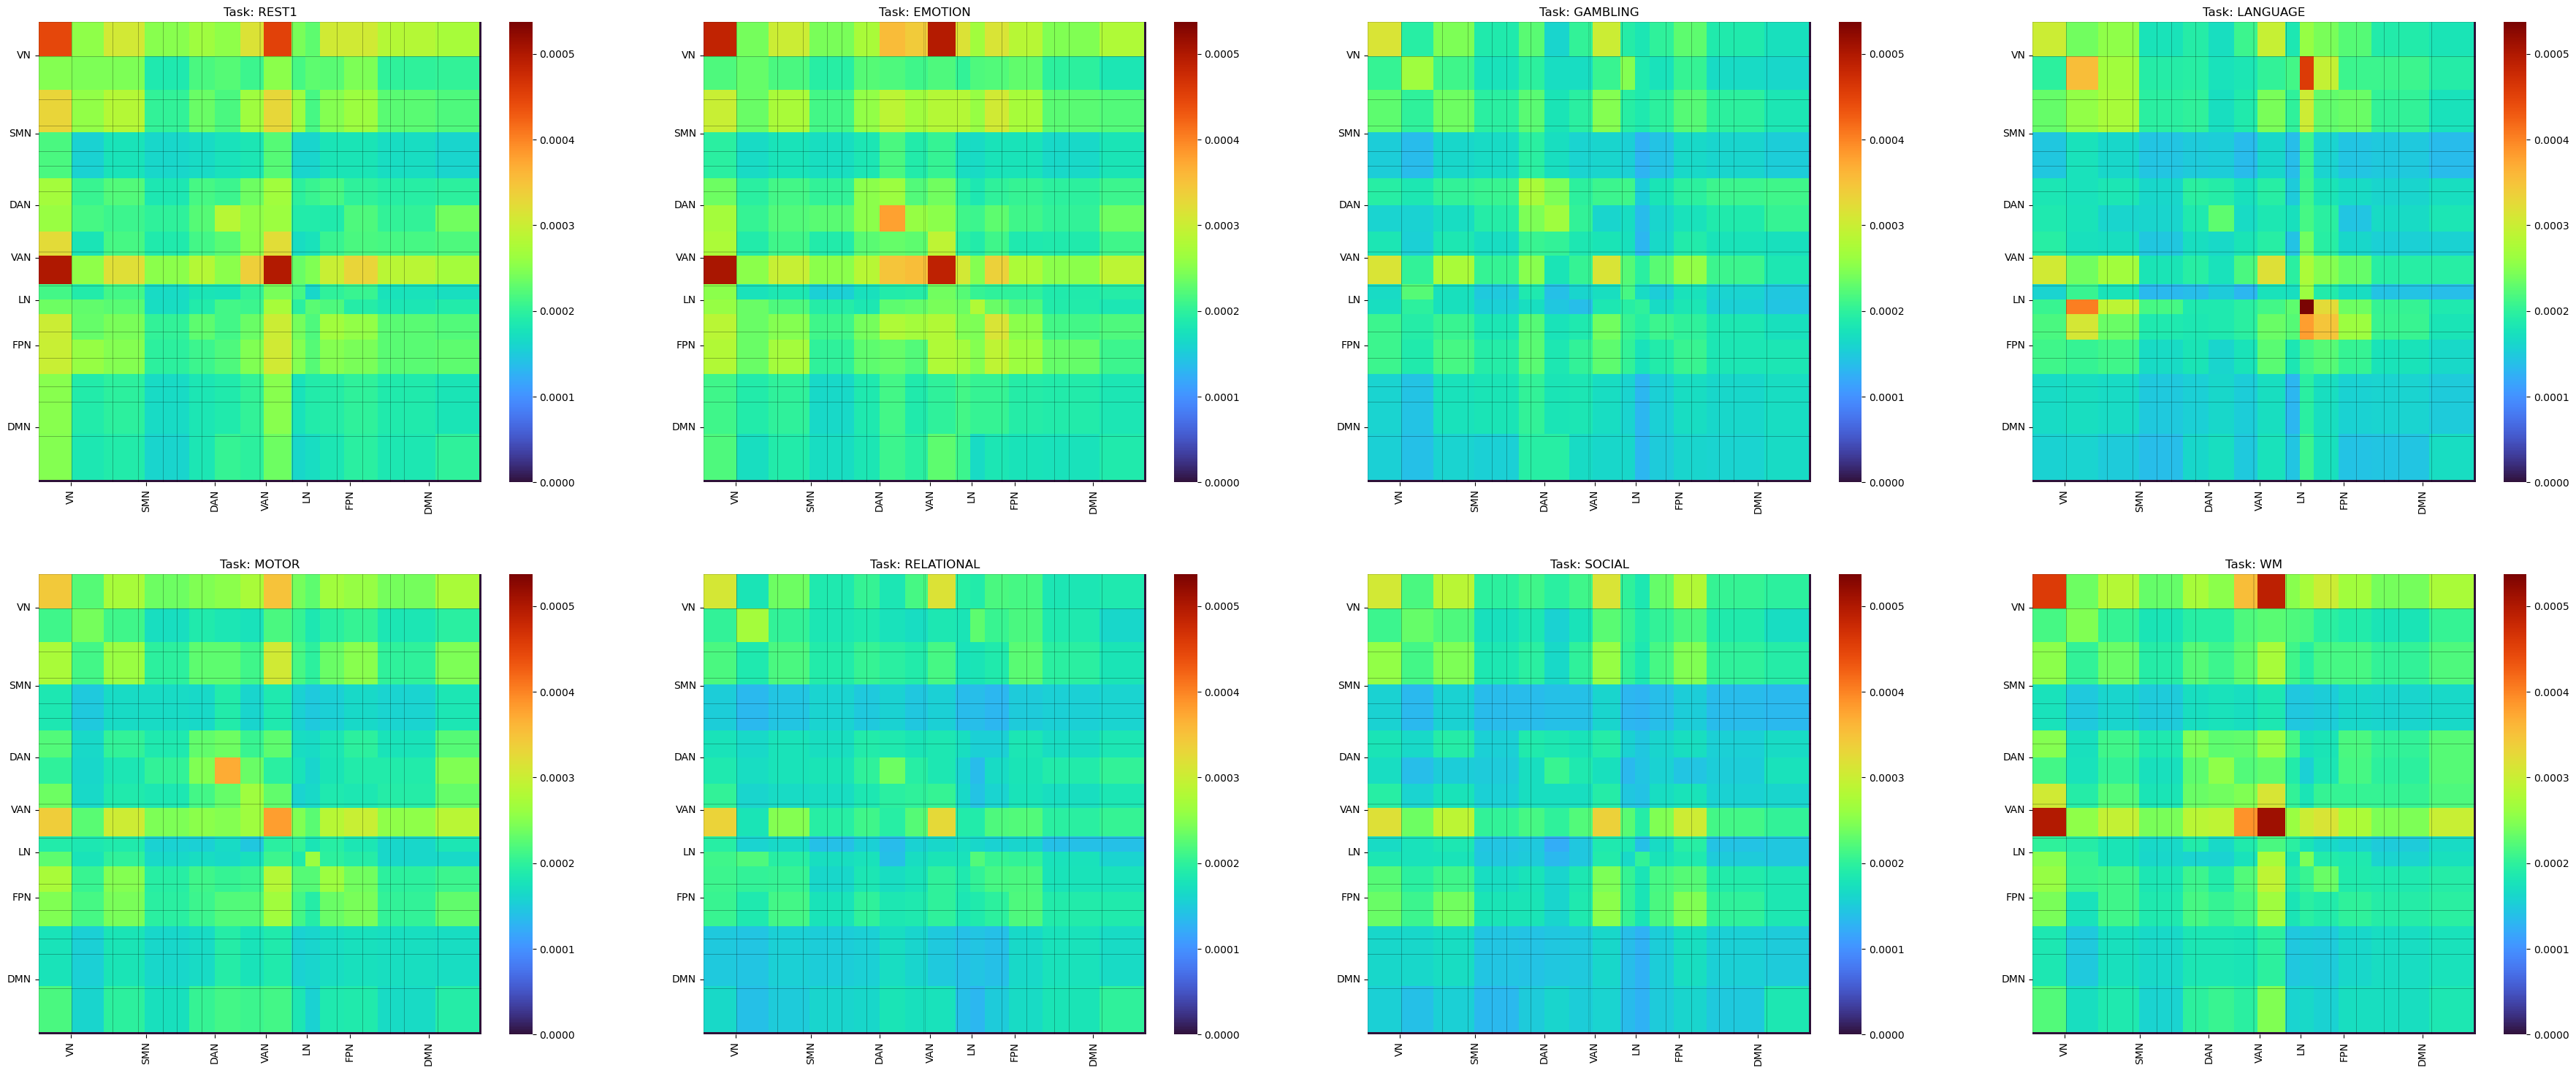

In [21]:
window_mean = np.array(
    [network_mean(np.abs(att).mean(axis=0)) for att in attributions[1:]]
)
attributions_cmap = "turbo"

vmin = 0
vmax = window_mean.max()
fig, axs = plt.subplots(2, 4, figsize=(45, 18))
for i, task in enumerate(task_labels):
    ax = axs.flatten()[i]
    plot = move_networks_to_adjacent(window_mean[i])
    sns.heatmap(plot, cmap=attributions_cmap, ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xticks(ticks=xticks, labels=xticklabels, rotation=90)
    ax.set_yticks(ticks=yticks, labels=yticklabels, rotation=0)
    for v in networks_ids_for_plot.values():
        ax.axvline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[0], color="black", linewidth=lw, alpha=alpha)
        ax.axvline(v[1], color="black", linewidth=lw, alpha=alpha)
        ax.axhline(v[1], color="black", linewidth=lw, alpha=alpha)
    ax.set_title(f"Task: {task}")

In [22]:
# name = Path("results/LinearShared_best_repro_FINAL_attributions.npy").stem
# save_interpretability_array_to_mat(attributions, f"results/{name}_attributions.mat", mean_axis=1)